# Manuscript Figures 1
## getting the main manuscript PDF figures in 1 place for edits
* Some PDFs from AllSites_RandomForest_1_plots.ipynb (linux)
* Some PDFs from AllSites_Analysis_4_hist.ipynb (local)

created by Cassie Lumbrazo\
date: Sept 2023\
python environment: **raster**, using raster for now


In [30]:
# import packages 
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr

import copy 
import pickle

from scipy import stats
from scipy.stats import norm

# interactive plotting
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots # adding for subplots
import plotly.figure_factory as ff

In [31]:
df_unload = pd.read_csv("allsites_snowunload.csv")
df_unload.head()

datetime  shortwave  longwave  windspeed      RH   temp    A   
0  2016-10-06 06:00:00       4.93   297.470      1.180  96.650 -3.495  1.0  \
1  2016-10-06 07:00:00      29.43   298.655      1.735  93.195 -3.325  1.0   
2  2016-10-06 08:00:00     124.50   309.965      2.080  83.190 -2.430  1.0   
3  2016-10-06 09:00:00     102.04   306.465      2.745  90.135 -3.250  1.0   
4  2016-10-06 10:00:00     614.38   240.145      4.595  80.390 -3.350  1.0   

     B   CD    E  Type Class Snow      Sunlit Classification  Typesymbol   
0  0.0  1.0  0.0   NaN   NaN  NaN  Not Sunlit   Snow Staying       128.0  \
1  0.0  1.0  0.0   NaN   NaN  NaN  Not Sunlit   Snow Staying       128.0   
2  0.0  1.0  0.0   NaN   NaN  NaN  Not Sunlit   Snow Staying       128.0   
3  0.0  1.0  0.0   NaN   NaN  NaN  Not Sunlit   Snow Staying       128.0   
4  1.0  1.0  0.0   NaN   NaN  NaN  Not Sunlit   Snow Staying       128.0   

   Snowsymbol   site  pressure  snowdepth  
0       128.0  niwot       NaN        NaN  
1       128.0  niwot       NaN        NaN  
2       128.0  niwot       NaN        NaN  
3       128.0  niwot       NaN        NaN  
4       128.0  niwot       NaN        NaN

# Prepare the data

#### Calculate staying vs. unloading inside the decision trees 

In [32]:
color_num1 = 'teal' # darkcyan
color_num2 = 'red'

color_more = 'teal' # darkcyan
color_less = 'red'

In [33]:
colorsnow2 = '#7dcfd4' # slightly desaturated cyan

In [34]:
## Define some plotting constants for easier coding 
plt.close('all')

# Colors
# colorsnow = '#7dcfd4' # slightly desaturated cyan
colorsnowunload = '#1F15D5' # bright, deep blue 
colorsnow2 = '#2acfd4' # a bit brighter cyan than colorsnow, we will try to see if this looks better on the plots
# unloadcolors = [colorsnow, colorsnowunload]
unloadcolors = [colorsnow2, colorsnowunload]

namesnow = 'snow staying'
namesnowunload = 'snow unloading'
group_labels = ['snow staying', 'snow unloading']

# all the titles needed throughout the notebook
namesodankyla = 'Sodankylä, Finland'
namelaret = 'Davos Laret, Switzerland'
nameniwot = 'Niwot Ridge, Colorado, USA'

namesodankylaA = 'A)  Sodankylä, Finland'
namelaretB = 'B)  Davos Laret, Switzerland'
nameniwotC = 'C)  Niwot Ridge, Colorado, USA'

nameallsitesA = 'A)  All Sites Together'
namesodankylaB = 'B)  Sodankylä, Finland'
namelaretC = 'C)  Davos Laret, Switzerland'
nameniwotD = 'D)  Niwot Ridge, Colorado, USA'

nametemperature = "air temperature (℃)"
namewindspeed = "wind speed (ms⁻¹)"
nameshortwave = "shortwave radiation (Wm⁻²)"

print(nametemperature)
print(namewindspeed)
print(nameshortwave)

air temperature (℃)
wind speed (ms⁻¹)
shortwave radiation (Wm⁻²)


In [35]:
# building the decision tree from top to bottom, row one through three (l:left, to r:right decisions)

# Assigning the Random Forest Result values (change at the top if needed)
# row 1 
shortwave_num1 = 258.0

# row 2 
shortwave_num2 = 57.5
temperture_num2 = -2.5 

# row 3 
windspeed_num3_left = 3.5 
temperature_num3_left = 0.5
windspeed_num3_right = 5.5
temperature_num3_right=1.5 


# Breaking up the data
# row one 
df_l = df_unload.where((df_unload.shortwave <= shortwave_num1))
df_r = df_unload.where((df_unload.shortwave >  shortwave_num1))

# row two
df_ll = df_unload.where((df_unload.shortwave <= shortwave_num1) & (df_unload.shortwave <= shortwave_num2)) 
df_lr = df_unload.where((df_unload.shortwave <= shortwave_num1) & (df_unload.shortwave >  shortwave_num2))
df_rl = df_unload.where((df_unload.shortwave >  shortwave_num1) & (df_unload.temp      <= temperture_num2))
df_rr = df_unload.where((df_unload.shortwave >  shortwave_num1) & (df_unload.temp      >  temperture_num2))

# row three
df_lll = df_unload.where((df_unload.shortwave <= shortwave_num1) & (df_unload.shortwave <= shortwave_num2) & (df_unload.windspeed <=  windspeed_num3_left))  
df_llr = df_unload.where((df_unload.shortwave <= shortwave_num1) & (df_unload.shortwave <= shortwave_num2) & (df_unload.windspeed >   windspeed_num3_left))

df_lrl = df_unload.where((df_unload.shortwave <= shortwave_num1) & (df_unload.shortwave >  shortwave_num2) & (df_unload.temp     <= temperature_num3_left))
df_lrr = df_unload.where((df_unload.shortwave <= shortwave_num1) & (df_unload.shortwave >  shortwave_num2) & (df_unload.temp     >  temperature_num3_left))

df_rll = df_unload.where((df_unload.shortwave >  shortwave_num1) & (df_unload.temp <= temperture_num2)     & (df_unload.windspeed <=  windspeed_num3_right)) 
df_rlr = df_unload.where((df_unload.shortwave >  shortwave_num1) & (df_unload.temp <= temperture_num2)     & (df_unload.windspeed >   windspeed_num3_right))

df_rrl = df_unload.where((df_unload.shortwave >  shortwave_num1) & (df_unload.temp >  temperture_num2)     & (df_unload.temp     <= temperature_num3_right)) 
df_rrr = df_unload.where((df_unload.shortwave >  shortwave_num1) & (df_unload.temp >  temperture_num2)     & (df_unload.temp     >  temperature_num3_right))

In [36]:
# first, for the entire dataset 
df_staying   = df_unload.where((df_unload.CD == 1)).dropna(how='all') 
df_unloading = df_unload.where((df_unload.CD == 0)).dropna(how='all') 

# node 1
df_l_staying   = df_l.where((df_l.CD == 1)).dropna(how='all') # where CD == 1, meaning Snow Staying 
df_l_unloading = df_l.where((df_l.CD == 0)).dropna(how='all') # where CD == 0, meaning Snow Unloading 

df_r_staying   = df_r.where((df_r.CD == 1)).dropna(how='all') 
df_r_unloading = df_r.where((df_r.CD == 0)).dropna(how='all')  

# node 2
df_ll_staying   = df_ll.where((df_ll.CD == 1)).dropna(how='all') 
df_ll_unloading = df_ll.where((df_ll.CD == 0)).dropna(how='all') 

df_lr_staying   = df_lr.where((df_lr.CD == 1)).dropna(how='all') 
df_lr_unloading = df_lr.where((df_lr.CD == 0)).dropna(how='all') 



df_rl_staying   = df_rl.where((df_rl.CD == 1)).dropna(how='all') 
df_rl_unloading = df_rl.where((df_rl.CD == 0)).dropna(how='all') 

df_rr_staying   = df_rr.where((df_rr.CD == 1)).dropna(how='all') 
df_rr_unloading = df_rr.where((df_rr.CD == 0)).dropna(how='all') 


# node 3
df_lll_staying   = df_lll.where((df_lll.CD == 1)).dropna(how='all') 
df_lll_unloading   = df_lll.where((df_lll.CD == 0)).dropna(how='all') 

df_llr_staying   = df_llr.where((df_llr.CD == 1)).dropna(how='all')
df_llr_unloading   = df_llr.where((df_llr.CD == 0)).dropna(how='all')


df_lrl_staying = df_lrl.where((df_lrl.CD == 1)).dropna(how='all')  
df_lrl_unloading = df_lrl.where((df_lrl.CD == 0)).dropna(how='all')

df_lrr_staying = df_lrr.where((df_lrr.CD == 1)).dropna(how='all') 
df_lrr_unloading = df_lrr.where((df_lrr.CD == 0)).dropna(how='all') 



df_rll_staying   = df_rll.where((df_rll.CD == 1)).dropna(how='all') 
df_rll_unloading   = df_rll.where((df_rll.CD == 0)).dropna(how='all') 

df_rlr_staying   = df_rlr.where((df_rlr.CD == 1)).dropna(how='all') 
df_rlr_unloading   = df_rlr.where((df_rlr.CD == 0)).dropna(how='all') 


df_rrl_staying = df_rrl.where((df_rrl.CD == 1)).dropna(how='all') 
df_rrl_unloading = df_rrl.where((df_rrl.CD == 0)).dropna(how='all') 

df_rrr_staying = df_rrr.where((df_rrr.CD == 1)).dropna(how='all') 
df_rrr_unloading = df_rrr.where((df_rrr.CD == 0)).dropna(how='all') 

In [37]:
nametemperature = "air temperature (℃)"
namewindspeed = "wind speed (ms⁻¹)"
nameshortwave = "shortwave radiation (Wm⁻²)"

print(nametemperature)
print(namewindspeed)
print(nameshortwave)

air temperature (℃)
wind speed (ms⁻¹)
shortwave radiation (Wm⁻²)


# Plots

## Methods Figure. PDF colored by each site. 

In [38]:
# define data 
# set plot constants 
group_labels = ['All Sites Together', 'Niwot Ridge, Colorado, USA', 'Davos Laret, Switzerland', 'Sodankylä, Finland']
colors = ['black', 'green', 'orange', 'mediumblue'] # my colors 

fig = make_subplots(rows=3, cols=1, shared_yaxes=False, shared_xaxes=False, 
                    # subplot_titles=("", namesod, "", "", namelaret, "", "", nameniwot), 
                    horizontal_spacing = 0.04, vertical_spacing = 0.08)

# create distplot 1
# temperature 
x1 = df_unload.temp.where(df_unload.site == 'niwot').dropna(how='all')
x2 = df_unload.temp.where(df_unload.site == 'laret').dropna(how='all')
x3 = df_unload.temp.where(df_unload.site == 'sod').dropna(how='all')
x4 = df_unload.temp.dropna(how='all')
hist_data = [x4, x1, x2, x3]

fig1 = ff.create_distplot(hist_data, group_labels, bin_size=1, colors=colors, 
                             show_hist=False, show_rug=False, curve_type='normal')

for trace in fig1.select_traces():
    fig.add_trace(trace, row=1, col=1)

# shortwave 
x1 = df_unload.shortwave.where(df_unload.site == 'niwot').dropna(how='all')
x2 = df_unload.shortwave.where(df_unload.site == 'laret').dropna(how='all')
x3 = df_unload.shortwave.where(df_unload.site == 'sod').dropna(how='all')
x4 = df_unload.shortwave.dropna(how='all')
hist_data = [x4, x1, x2, x3]

fig2 = ff.create_distplot(hist_data, group_labels, bin_size=1, colors=colors, 
                             show_hist=False, show_rug=False, curve_type='normal')

for trace in fig2.select_traces():
    fig.add_trace(trace, row=2, col=1)


# windspeed 
x1 = df_unload.windspeed.where(df_unload.site == 'niwot').dropna(how='all')
x2 = df_unload.windspeed.where(df_unload.site == 'laret').dropna(how='all')
x3 = df_unload.windspeed.where(df_unload.site == 'sod').dropna(how='all')
x4 = df_unload.windspeed.dropna(how='all')
hist_data = [x4, x1, x2, x3]

fig2 = ff.create_distplot(hist_data, group_labels, bin_size=1, colors=colors, 
                             show_hist=False, show_rug=False, curve_type='normal')
 
for trace in fig2.select_traces():
    fig.add_trace(trace, row=3, col=1)


fig.update_layout(title='', width=800, height=800, showlegend=True)

fig.update_xaxes(title_text=nametemperature, row=1, col=1, range=[-35, 7])
fig.update_xaxes(title_text=nameshortwave,   row=2, col=1, range=[0, 1100])
fig.update_xaxes(title_text=namewindspeed,   row=3, col=1, range=[0, 15])

# fig.update_yaxes(row=1, col=1, range=[0, .085]) # range for the full PDF of temperature
# fig.update_yaxes(row=1, col=1, range=[0, .09]) # highest so far for temperature, needed for the second node left side
# fig.update_yaxes(row=1, col=1, range=[0, .23]) # highest so far for temperature, needed for the third node right side

fig.update_yaxes(title="probability density", row=2, col=1)
# fig.update_yaxes(row=2, col=1, range=[0, .003]) # range for the full PDF of shortwave
# fig.update_yaxes(row=2, col=1, range=[0, 0.007]) # highest so far for shortwave, needed for the second node left side


# fig.update_yaxes(row=3, col=1, range=[0, 0.21])  # range for the full PDF of windspeed
# fig.update_yaxes(row=3, col=1, range=[0, 0.25])  # highest so far for wind speed, needed for the third node left side

fig.show()

## Random Forest Results Figure. Full PDFs with the thresholds. 
* this code came from a local notebook, AllSites_Analysis_4_hist.ipynb if you need more notes and info

In [39]:
# create seperate datasets so that all the plots still work together 
# names in the code below 
all_snowstay   = df_unload.where((df_unload.CD == 1)).dropna(how='all') 
all_snowunload = df_unload.where((df_unload.CD == 0)).dropna(how='all')

niwot_df_snowstay   = all_snowstay.where(all_snowstay.site == 'niwot').dropna(how='all')
niwot_df_snowunload = all_snowunload.where(all_snowunload.site == 'niwot').dropna(how='all')

laret_df_snowstay   = all_snowstay.where(all_snowstay.site == 'laret').dropna(how='all')
laret_df_snowunload = all_snowunload.where(all_snowunload.site == 'laret').dropna(how='all')

sod_df_snowstay   = all_snowstay.where(all_snowstay.site == 'sod').dropna(how='all')
sod_df_snowunload = all_snowunload.where(all_snowunload.site == 'sod').dropna(how='all')

In [40]:
# define data 
# threshold_line_color = 'grey'
threshold_line_color = 'darkslategrey'
threshold_line_opacity = .4

# set plot constants 
group_labels = ['snow staying', 'snow unloading']

# trying different colors for snow in the canopy for these plots only... we will see if it helps
colorsnow = '#7dcfd4' # slightly desaturated cyan
colorsnowunload = '#1F15D5' # bright, deep blue 
colorsnow2 = '#2acfd4' # a bit brighter cyan than colorsnow, we will try to see if this looks better on the plots
# unloadcolors = [colorsnow, colorsnowunload]
colors = [colorsnow2, colorsnowunload] # my colors 

bintemp = 1
binwind = 1
binSW = 20

fig = make_subplots(rows=4, cols=3, shared_yaxes='columns', shared_xaxes='columns', 
                    subplot_titles=("", nameallsitesA, "", "", namesodankylaB, "", "", namelaretC, "", "", nameniwotD), # centered
                    # subplot_titles=(namesod,"", "", namelaret, "", "", nameniwot, "", ""), # on the first one
                    horizontal_spacing = 0.04, vertical_spacing = 0.04)

# ROW ZERO NOW ADDING IT_____________________________________________________________________________________________________
# sod temperature 
x1 = all_snowstay.temp.dropna(how='all') 
x2 = all_snowunload.temp.dropna(how='all') 
hist_data = [x1, x2]

fig1 = ff.create_distplot(hist_data, group_labels, bin_size=bintemp, colors=colors, 
                             show_hist=False, show_rug=False, curve_type='normal')


for trace in fig1.select_traces():
    fig.add_trace(trace, row=1, col=1)
    fig.add_vline(x=-2.5, line_color=threshold_line_color, row=1, col=1, opacity=threshold_line_opacity)
    fig.add_vline(x=1.5, line_color=threshold_line_color, row=1, col=1, opacity=threshold_line_opacity)
    fig.add_vline(x=0.5, line_color=threshold_line_color, row=1, col=1, opacity=threshold_line_opacity)

# sod shortwave 
x1 = all_snowstay.shortwave.dropna(how='all') 
x2 = all_snowunload.shortwave.dropna(how='all') 
hist_data = [x1, x2]

fig2 = ff.create_distplot(hist_data, group_labels, bin_size=binSW, colors=colors, 
                             show_hist=False, show_rug=False, curve_type='normal')


for trace in fig2.select_traces():
    fig.add_trace(trace, row=1, col=2)
    fig.add_vline(x=258, line_color=threshold_line_color, row=1, col=2, opacity=threshold_line_opacity)
    fig.add_vline(x=57.5, line_color=threshold_line_color, row=1, col=2, opacity=threshold_line_opacity)


# sod windspeed 
x1 = all_snowstay.windspeed.dropna(how='all') 
x2 = all_snowunload.windspeed.dropna(how='all') 
hist_data = [x1, x2]

fig2 = ff.create_distplot(hist_data, group_labels, bin_size=bintemp, colors=colors, 
                             show_hist=False, show_rug=False, curve_type='normal')


for trace in fig2.select_traces():
    fig.add_trace(trace, row=1, col=3)
    fig.add_vline(x=3.5, line_color=threshold_line_color, row=1, col=3, opacity=threshold_line_opacity)
    fig.add_vline(x=5.5, line_color=threshold_line_color, row=1, col=3, opacity=threshold_line_opacity)

# FIRST ROW_____________________________________________________________________________________________________
# sod temperature 
x1 = sod_df_snowstay.temp.dropna(how='all') 
x2 = sod_df_snowunload.temp.dropna(how='all') 
hist_data = [x1, x2]

fig1 = ff.create_distplot(hist_data, group_labels, bin_size=bintemp, colors=colors, 
                             show_hist=False, show_rug=False, curve_type='normal')


for trace in fig1.select_traces():
    fig.add_trace(trace, row=2, col=1)
    fig.add_vline(x=-2.5, line_color=threshold_line_color, row=2, col=1, opacity=threshold_line_opacity)
    fig.add_vline(x=1.5, line_color=threshold_line_color, row=2, col=1, opacity=threshold_line_opacity)
    fig.add_vline(x=0.5, line_color=threshold_line_color, row=2, col=1, opacity=threshold_line_opacity)


# sod shortwave 
x1 = sod_df_snowstay.shortwave.dropna(how='all') 
x2 = sod_df_snowunload.shortwave.dropna(how='all') 
hist_data = [x1, x2]

fig2 = ff.create_distplot(hist_data, group_labels, bin_size=binSW, colors=colors, 
                             show_hist=False, show_rug=False, curve_type='normal')


for trace in fig2.select_traces():
    fig.add_trace(trace, row=2, col=2)
    fig.add_vline(x=258, line_color=threshold_line_color, row=2, col=2, opacity=threshold_line_opacity)
    fig.add_vline(x=57.5, line_color=threshold_line_color, row=2, col=2, opacity=threshold_line_opacity)


# sod windspeed 
x1 = sod_df_snowstay.windspeed.dropna(how='all') 
x2 = sod_df_snowunload.windspeed.dropna(how='all') 
hist_data = [x1, x2]

fig2 = ff.create_distplot(hist_data, group_labels, bin_size=bintemp, colors=colors, 
                             show_hist=False, show_rug=False, curve_type='normal')


for trace in fig2.select_traces():
    fig.add_trace(trace, row=2, col=3)
    fig.add_vline(x=3.5, line_color=threshold_line_color, row=2, col=3, opacity=threshold_line_opacity)
    fig.add_vline(x=5.5, line_color=threshold_line_color, row=2, col=3, opacity=threshold_line_opacity)


# SECOND ROW_____________________________________________________________________________________________________
# laret temperature 
x1 = laret_df_snowstay.temp.dropna(how='all') 
x2 = laret_df_snowunload.temp.dropna(how='all') 
hist_data = [x1, x2]

fig1 = ff.create_distplot(hist_data, group_labels, bin_size=bintemp, colors=colors, 
                             show_hist=False, show_rug=False, curve_type='normal')


for trace in fig1.select_traces():
    fig.add_trace(trace, row=3, col=1)
    fig.add_vline(x=-2.5, line_color=threshold_line_color, row=3, col=1, opacity=threshold_line_opacity)
    fig.add_vline(x=1.5, line_color=threshold_line_color, row=3, col=1, opacity=threshold_line_opacity)
    fig.add_vline(x=0.5, line_color=threshold_line_color, row=3, col=1, opacity=threshold_line_opacity)

# laret shortwave 
x1 = laret_df_snowstay.shortwave.dropna(how='all') 
x2 = laret_df_snowunload.shortwave.dropna(how='all') 
hist_data = [x1, x2]

fig2 = ff.create_distplot(hist_data, group_labels, bin_size=binSW, colors=colors, 
                             show_hist=False, show_rug=False, curve_type='normal')


for trace in fig2.select_traces():
    fig.add_trace(trace, row=3, col=2)
    fig.add_vline(x=258, line_color=threshold_line_color, row=3, col=2, opacity=threshold_line_opacity)
    fig.add_vline(x=57.5, line_color=threshold_line_color, row=3, col=2, opacity=threshold_line_opacity)


# laret windspeed 
x1 = laret_df_snowstay.windspeed.dropna(how='all') 
x2 = laret_df_snowunload.windspeed.dropna(how='all') 
hist_data = [x1, x2]

fig2 = ff.create_distplot(hist_data, group_labels, bin_size=bintemp, colors=colors, 
                             show_hist=False, show_rug=False, curve_type='normal')


for trace in fig2.select_traces():
    fig.add_trace(trace, row=3, col=3)
    fig.add_vline(x=3.5, line_color=threshold_line_color, row=3, col=3, opacity=threshold_line_opacity)
    fig.add_vline(x=5.5, line_color=threshold_line_color, row=3, col=3, opacity=threshold_line_opacity)

# THIRD ROW_____________________________________________________________________________________________________
# niwot temperature 
x1 = niwot_df_snowstay.temp.dropna(how='all') 
x2 = niwot_df_snowunload.temp.dropna(how='all') 
hist_data = [x1, x2]

fig1 = ff.create_distplot(hist_data, group_labels, bin_size=bintemp, colors=colors, 
                             show_hist=False, show_rug=False, curve_type='normal')


for trace in fig1.select_traces():
    fig.add_trace(trace, row=4, col=1)
    fig.add_vline(x=-2.5, line_color=threshold_line_color, row=4, col=1, opacity=threshold_line_opacity)
    fig.add_vline(x=1.5, line_color=threshold_line_color, row=4, col=1, opacity=threshold_line_opacity)
    fig.add_vline(x=0.5, line_color=threshold_line_color, row=4, col=1, opacity=threshold_line_opacity)
    

# niwot shortwave 
x1 = niwot_df_snowstay.shortwave.dropna(how='all') 
x2 = niwot_df_snowunload.shortwave.dropna(how='all') 
hist_data = [x1, x2]

fig2 = ff.create_distplot(hist_data, group_labels, bin_size=binSW, colors=colors, 
                             show_hist=False, show_rug=False, curve_type='normal')


for trace in fig2.select_traces():
    fig.add_trace(trace, row=4, col=2)
    fig.add_vline(x=258, line_color=threshold_line_color, row=4, col=2, opacity=threshold_line_opacity)
    fig.add_vline(x=57.5, line_color=threshold_line_color, row=4, col=2, opacity=threshold_line_opacity)


# niwot windspeed 
x1 = niwot_df_snowstay.windspeed.dropna(how='all') 
x2 = niwot_df_snowunload.windspeed.dropna(how='all') 
hist_data = [x1, x2]

fig2 = ff.create_distplot(hist_data, group_labels, bin_size=bintemp, colors=colors,
                             show_hist=False, show_rug=False, curve_type='normal')


for trace in fig2.select_traces():
    fig.add_trace(trace, row=4, col=3)
    # fig.add_vline(x=np.mean(x1), line_color=colorsnow, line_dash='dash', row=4, col=3) # the code if we want to plot the mean PDF lines
    # fig.add_vline(x=np.mean(x2), line_color=colorsnowunload, line_dash='dash', row=4, col=3)
    fig.add_vline(x=3.5, line_color=threshold_line_color, row=4, col=3, opacity=threshold_line_opacity)
    fig.add_vline(x=5.5, line_color=threshold_line_color, row=4, col=3, opacity=threshold_line_opacity)
    # fig.add_trace(trace, row=4, col=3) # was trying to put this here to reorder.., but it did not do anything 



# update legends layouts and labels 
fig.update_layout(title='', width=1200, height=1000, showlegend=False)

fig.update_yaxes(title_text='probability density', row=3, col=1) # consider trying to make this a text on the side of the page instead to center it

fig.update_xaxes(title_text=nametemperature, row=4, col=1)
fig.update_xaxes(title_text=nameshortwave, row=4, col=2)
fig.update_xaxes(title_text=namewindspeed, row=4, col=3)

# fig.add_annotation(x=2, y=.1, text='texting', )

fig.show()

## Random Forest Results Figure. PDFs with the subsets of data for all the random forest thresholds

In [41]:
# fillcolor_1 = 'darksalmon'
# fillopacity_1 = 0.2
# fillcolor_2 = 'orange'
# fillopacity_2 = 0.1

fillcolor_1 = colorsnow
fillopacity_1 = 0.2
fillcolor_2 = colorsnowunload
fillopacity_2 = 0.1

# trying different colors for snow in the canopy for these plots only... we will see if it helps
colorsnow = '#7dcfd4' # slightly desaturated cyan
colorsnowunload = '#1F15D5' # bright, deep blue 
colorsnow2 = '#2acfd4' # a bit brighter cyan than colorsnow, we will try to see if this looks better on the plots
# unloadcolors = [colorsnow, colorsnowunload]
colors = [colorsnow2, colorsnowunload]

Node 1

In [42]:
# define data 
x1 = df_staying.shortwave.dropna(how='all')
x2 = df_unloading.shortwave.dropna(how='all')
bin_sizes = 1

hist_data = [x1,x2]

# Create distplot 
fig = ff.create_distplot(hist_data, group_labels, bin_size=1, 
                         colors=colors, show_hist=False, show_rug=False,
                         curve_type='normal') # override deafult "kde" curve.. look inot this 


# fig.add_vline(x=258, line_color='grey')
fig.add_vrect(x0=0, x1=258, fillcolor=fillcolor_1, opacity=fillopacity_1, layer="below", line_width=0)
fig.add_vrect(x0=258, x1=1100, fillcolor=fillcolor_2, opacity=fillopacity_2, layer="below", line_width=0)

fig.update_layout(title='', width=700, height=400, yaxis_title="probability density")

fig.update_xaxes(title_text=nameshortwave,   range=[0, 1100])
fig.update_xaxes(range=[0, 1100])
# fig.update_yaxes(range=[0, 0.003])
# fig.update_yaxes(range=[0, 0.007]) # highest so far for shortwave, needed for the second node left side


# to change the coloring from grey background to white with grey gridlines (comment out if you want origional coloring and sizing)
fig.update_layout(plot_bgcolor='white', legend={'traceorder':'normal'}, legend_font=dict(size=16))
fig.update_xaxes(showline=True, gridcolor='lightgrey', linecolor='lightgrey', title_font=dict(size=24), tickfont=dict(size=18))
fig.update_yaxes(showline=True, gridcolor='lightgrey', linecolor='lightgrey', title_font=dict(size=18), tickfont=dict(size=18))


fig.show()
# first node data split 

Node 2

In [43]:
# define data 
x1 = df_l_staying.shortwave.dropna(how='all')
x2 = df_l_unloading.shortwave.dropna(how='all')
bin_sizes = 1

hist_data = [x1,x2]

# Create distplot 
fig = ff.create_distplot(hist_data, group_labels, bin_size=1, 
                         colors=colors, show_hist=False, show_rug=False,
                         curve_type='normal') # override deafult "kde" curve.. look inot this 


# fig.add_vline(x=258, line_color='grey')
fig.add_vrect(x0=0, x1=57.5, fillcolor=fillcolor_1, opacity=fillopacity_1, layer="below", line_width=0)
fig.add_vrect(x0=57.5, x1=258, fillcolor=fillcolor_2, opacity=fillopacity_2, layer="below", line_width=0)

fig.update_layout(title='', width=700, height=400, yaxis_title="probability density", 
                  xaxis_title=nameshortwave)

fig.update_xaxes(title_text=nameshortwave,   range=[0, 1100])
fig.update_xaxes(range=[0, 1100])
fig.update_yaxes(range=[0, 0.007]) # highest so far for shortwave, needed for the second node left side
fig.update_yaxes(range=[0, 0.09])  # highest for node 2 

# to change the coloring from grey background to white with grey gridlines (comment out if you want origional coloring and sizing)
fig.update_layout(plot_bgcolor='white', legend={'traceorder':'normal'}, legend_font=dict(size=16))
fig.update_xaxes(showline=True, gridcolor='lightgrey', linecolor='lightgrey', title_font=dict(size=24), tickfont=dict(size=18))
fig.update_yaxes(showline=True, gridcolor='lightgrey', linecolor='lightgrey', title_font=dict(size=18), tickfont=dict(size=18))


fig.show()
# Node 2, left side 

In [44]:
# define data 
x1 = df_r_staying.temp.dropna(how='all')
x2 = df_r_unloading.temp.dropna(how='all')
bin_sizes = 1

hist_data = [x1,x2]

# Create distplot 
fig = ff.create_distplot(hist_data, group_labels, bin_size=1, 
                         colors=colors, show_hist=False, show_rug=False,
                         curve_type='normal') # override deafult "kde" curve.. look inot this 


# fig.add_vline(x=258, line_color='grey')
fig.add_vrect(x0=-37, x1=-2.5, fillcolor=fillcolor_1, opacity=fillopacity_1, layer="below", line_width=0)
fig.add_vrect(x0=-2.5, x1=7, fillcolor=fillcolor_2, opacity=fillopacity_2, layer="below", line_width=0)

fig.update_layout(title='', width=700, height=400, yaxis_title="probability density")

fig.update_xaxes(title_text=nametemperature, range=[-35, 7])
# fig.update_yaxes(range=[0, .09]) # highest so far, needed for the second node left side
# fig.update_yaxes(range=[0, .23]) # highest so far for temperature, needed for the third node right side
fig.update_yaxes(range=[0, 0.09])  # highest for node 2 

# to change the coloring from grey background to white with grey gridlines (comment out if you want origional coloring and sizing)
fig.update_layout(plot_bgcolor='white', legend={'traceorder':'normal'}, legend_font=dict(size=16))
fig.update_xaxes(showline=True, gridcolor='lightgrey', linecolor='lightgrey', title_font=dict(size=24), tickfont=dict(size=18))
fig.update_yaxes(showline=True, gridcolor='lightgrey', linecolor='lightgrey', title_font=dict(size=18), tickfont=dict(size=18))

fig.show()
# node two, right side

Node 3 

In [45]:
# define data 
x1 = df_ll_staying.windspeed.dropna(how='all')
x2 = df_ll_unloading.windspeed.dropna(how='all')
bin_sizes = 1

hist_data = [x1,x2]

# Create distplot 
fig = ff.create_distplot(hist_data, group_labels, bin_size=1, 
                         colors=colors, show_hist=False, show_rug=False,
                         curve_type='normal') # override deafult "kde" curve.. look inot this 


# fig.add_vline(x=258, line_color='grey')
fig.add_vrect(x0=0, x1=3.5, fillcolor=fillcolor_1, opacity=fillopacity_1, layer="below", line_width=0)
fig.add_vrect(x0=3.5, x1=15, fillcolor=fillcolor_2, opacity=fillopacity_2, layer="below", line_width=0)

fig.update_layout(title='', width=700, height=400, yaxis_title="probability density", xaxis_title=namewindspeed)

fig.update_xaxes(title_text=namewindspeed,   range=[0, 15])
# fig.update_yaxes(range=[0, 0.25])  # highest so far for wind speed, needed for the third node left side
fig.update_yaxes(range=[0, 0.25])  # highest for node 3 

# to change the coloring from grey background to white with grey gridlines (comment out if you want origional coloring and sizing)
fig.update_layout(plot_bgcolor='white', legend={'traceorder':'normal'}, legend_font=dict(size=16))
fig.update_xaxes(showline=True, gridcolor='lightgrey', linecolor='lightgrey', title_font=dict(size=24), tickfont=dict(size=18))
fig.update_yaxes(showline=True, gridcolor='lightgrey', linecolor='lightgrey', title_font=dict(size=18), tickfont=dict(size=18))

fig.show()
# Node 3, left left side

In [46]:
# define data 
x1 = df_lr_staying.temp.dropna(how='all')
x2 = df_lr_unloading.temp.dropna(how='all')
bin_sizes = 1

hist_data = [x1,x2]

# Create distplot 
fig = ff.create_distplot(hist_data, group_labels, bin_size=1, 
                         colors=colors, show_hist=False, show_rug=False,
                         curve_type='normal') # override deafult "kde" curve.. look inot this 


# fig.add_vline(x=258, line_color='grey')
fig.add_vrect(x0=-37, x1=0.5,fillcolor=fillcolor_1, opacity=fillopacity_1, layer="below", line_width=0)
fig.add_vrect(x0=0.5, x1=7, fillcolor=fillcolor_2, opacity=fillopacity_2, layer="below", line_width=0)

fig.update_layout(title='', width=700, height=400, yaxis_title="probability density", xaxis_title=nametemperature)

fig.update_xaxes(title_text=nametemperature, range=[-35, 7])
# fig.update_yaxes(range=[0, .09]) # highest so far, needed for the second node left side
# fig.update_yaxes(range=[0, .23]) # highest so far for temperature, needed for the third node right side
fig.update_yaxes(range=[0, 0.25])  # highest for node 3 

# to change the coloring from grey background to white with grey gridlines (comment out if you want origional coloring and sizing)
fig.update_layout(plot_bgcolor='white', legend={'traceorder':'normal'}, legend_font=dict(size=16))
fig.update_xaxes(showline=True, gridcolor='lightgrey', linecolor='lightgrey', title_font=dict(size=24), tickfont=dict(size=18))
fig.update_yaxes(showline=True, gridcolor='lightgrey', linecolor='lightgrey', title_font=dict(size=18), tickfont=dict(size=18))

fig.show()
# Node 3, left right side 

In [47]:
# define data 
x1 = df_rl_staying.windspeed.dropna(how='all')
x2 = df_rl_unloading.windspeed.dropna(how='all')
bin_sizes = 1

hist_data = [x1,x2]

# Create distplot 
fig = ff.create_distplot(hist_data, group_labels, bin_size=1, 
                         colors=colors, show_hist=False, show_rug=False,
                         curve_type='normal') # override deafult "kde" curve.. look inot this 


# fig.add_vline(x=258, line_color='grey')
fig.add_vrect(x0=0, x1=5.5,fillcolor=fillcolor_1, opacity=fillopacity_1, layer="below", line_width=0)
fig.add_vrect(x0=5.5, x1=15, fillcolor=fillcolor_2, opacity=fillopacity_2, layer="below", line_width=0)

fig.update_layout(title='', width=700, height=400, yaxis_title="probability density", xaxis_title=namewindspeed)

fig.update_xaxes(title_text=namewindspeed,   range=[0, 15])
# fig.update_yaxes(range=[0, 0.25])  # highest so far for wind speed, needed for the third node left side
fig.update_yaxes(range=[0, 0.25])  # highest for node 3 

# to change the coloring from grey background to white with grey gridlines (comment out if you want origional coloring and sizing)
fig.update_layout(plot_bgcolor='white', legend={'traceorder':'normal'}, legend_font=dict(size=16))
fig.update_xaxes(showline=True, gridcolor='lightgrey', linecolor='lightgrey', title_font=dict(size=24), tickfont=dict(size=18))
fig.update_yaxes(showline=True, gridcolor='lightgrey', linecolor='lightgrey', title_font=dict(size=18), tickfont=dict(size=18))

fig.show()
# Node 3 right left side

In [48]:
# define data 
x1 = df_rr_staying.temp.dropna(how='all')
x2 = df_rr_unloading.temp.dropna(how='all')
bin_sizes = 1

hist_data = [x1,x2]

# Create distplot 
fig = ff.create_distplot(hist_data, group_labels, bin_size=1, 
                         colors=colors, show_hist=False, show_rug=False,
                         curve_type='normal') # override deafult "kde" curve.. look inot this 


# fig.add_vline(x=258, line_color='grey')
fig.add_vrect(x0=-2.5, x1=1.5, fillcolor=fillcolor_1, opacity=fillopacity_1, layer="below", line_width=0)
fig.add_vrect(x0=1.5, x1=7, fillcolor=fillcolor_2, opacity=fillopacity_2, layer="below", line_width=0)

fig.update_layout(title='', width=700, height=400, yaxis_title="probability density")

fig.update_xaxes(title_text=nametemperature, range=[-35, 7])
fig.update_yaxes(range=[0, .23]) # highest so far for temperature, needed for the third node right side
fig.update_yaxes(range=[0, 0.25])  # highest for node 3 


# to change the coloring from grey background to white with grey gridlines (comment out if you want origional coloring and sizing)
fig.update_layout(plot_bgcolor='white', legend={'traceorder':'normal'}, legend_font=dict(size=16))
fig.update_xaxes(showline=True, gridcolor='lightgrey', linecolor='lightgrey', title_font=dict(size=24), tickfont=dict(size=18))
fig.update_yaxes(showline=True, gridcolor='lightgrey', linecolor='lightgrey', title_font=dict(size=18), tickfont=dict(size=18))

# fig.update_layout(legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01))

fig.show()
# Node 3, right right side 

Other random forest plots

In [49]:
# shortwave .45, windspeed .27 or .26, temperature .31 for the feature importance 
# ax.set_title("Feature Importances")
# ax.set_ylabel("Mean decrease in impurity")

In [50]:
feature_importances = pd.DataFrame({'shortwave radiation': [.45], 'air temperature': [.31], 'wind speed': [.26]})
feature_importances

shortwave radiation  air temperature  wind speed
0                 0.45             0.31        0.26

Text(0, 0.5, 'mean decrease in impurity')

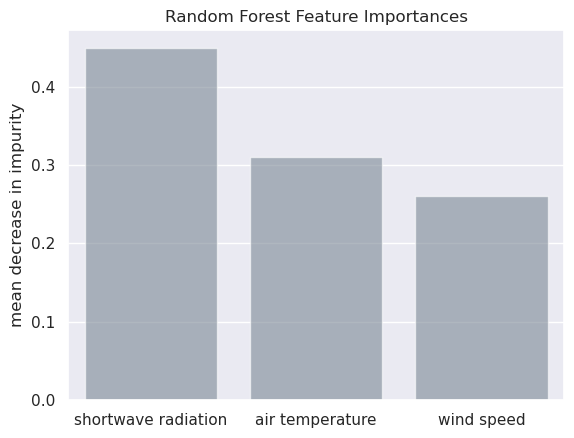

In [51]:
sns.barplot(data=feature_importances, color='lightslategrey', alpha=0.6)
plt.title("Random Forest Feature Importances")
plt.ylabel("mean decrease in impurity")

### Scatter Matrix of each unloading regime 

In [52]:
df_ll.dropna(how='all', inplace=True)
df_lr.dropna(how='all', inplace=True)
df_rl.dropna(how='all', inplace=True)
df_rr.dropna(how='all', inplace=True)

In [53]:
fig = make_subplots(rows=4, cols=4, 
                    # specs=[{"type": "scatter"}, {"type": "scatter"}, {"type": "scatter"}, {"type": "scatter"},
                    #        {"type": "scatter"}, {"type": "scatter"}, {"type": "scatter"}, {"type": "scatter"},
                    #        {"type": "scatter"}, {"type": "scatter"}, {"type": "scatter"}, {"type": "scatter"},
                    #        {"type": "scatter"}, {"type": "scatter"}, {"type": "scatter"}, {"type": "scatter"}],
                    subplot_titles=('Unloading Regime A', "", 'Unloading Regime B', "", 
                                    "", "", "", "", 
                                    "Unloading Regime C", "", "Unloading Regime D", "", 
                                    "", "", "", ""), 
                    shared_xaxes=False, shared_yaxes=False, 
                    vertical_spacing=0.05, horizontal_spacing=0.032,
                    
)

markersize = 6
markeropacity = 0.8
colorscaled = [[0., colorsnowunload], [1, colorsnow]] # we do not want the darker one here

#______________________________________________________________________________
# Decision tree, left left which is group A 
fig.add_trace(
    go.Scatter(
        x = df_ll['temp'],
        y = df_ll['windspeed'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_ll['CD'], 
        colorscale=colorscaled, 
        symbol=df_ll['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=1, col=1
)

fig.update_xaxes(range=[-35,8], row=1, col=1) 
fig.update_yaxes(title_text = namewindspeed, range=[-.5,15], row=1, col=1) 

fig.add_trace(
    go.Scatter(
        x = df_ll['temp'],
        y = df_ll['shortwave'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_ll['CD'], 
        colorscale=colorscaled, 
        symbol=df_ll['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=2, col=1
)

fig.update_xaxes(range=[-35,8], row=2, col=1) 
fig.update_yaxes(title_text = nameshortwave, range=[-50,1200], row=2, col=1)

fig.add_trace(
    go.Scatter(
        x = df_ll['windspeed'],
        y = df_ll['shortwave'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_ll['CD'], 
        colorscale=colorscaled, 
        symbol=df_ll['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=2, col=2
)

fig.update_xaxes(range=[-.5,15], row=2, col=2) 
fig.update_yaxes(range=[-50,1200], row=2, col=2)

#______________________________________________________________________________
# Decision tree, left right which is group B 
fig.add_trace(
    go.Scatter(
        x = df_lr['temp'],
        y = df_lr['windspeed'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_lr['CD'], 
        colorscale=colorscaled, 
        symbol=df_lr['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=1, col=3
)

fig.update_xaxes(range=[-35,8], row=1, col=1) 
fig.update_yaxes(title_text = namewindspeed, range=[-.5,15], row=1, col=3) 

fig.add_trace(
    go.Scatter(
        x = df_lr['temp'],
        y = df_lr['shortwave'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_lr['CD'], 
        colorscale=colorscaled, 
        symbol=df_lr['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=2, col=3
)

fig.update_xaxes(range=[-35,8], row=2, col=3) 
fig.update_yaxes(range=[-50,1200], row=2, col=3)

fig.add_trace(
    go.Scatter(
        x = df_lr['windspeed'],
        y = df_lr['shortwave'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_lr['CD'], 
        colorscale=colorscaled, 
        symbol=df_lr['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=2, col=4
)

fig.update_xaxes(range=[-.5,15], row=2, col=4) 
fig.update_yaxes(range=[-50,1200], row=2, col=4)

#______________________________________________________________________________
# Decision tree right left, which is group C
fig.add_trace(
    go.Scatter(
        x = df_rl['temp'],
        y = df_rl['windspeed'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_rl['CD'], 
        colorscale=colorscaled, 
        symbol=df_rl['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=3, col=1
)

fig.update_xaxes(range=[-35,8], row=3, col=1) 
fig.update_yaxes(title_text = namewindspeed, range=[-.5,15], row=3, col=1) 

fig.add_trace(
    go.Scatter(
        x = df_rl['temp'],
        y = df_rl['shortwave'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_rl['CD'], 
        colorscale=colorscaled, 
        symbol=df_rl['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=4, col=1
)

fig.update_xaxes(title_text = nametemperature, range=[-35,8], row=4, col=1) 
fig.update_yaxes(title_text = nameshortwave, range=[-50,1200], row=4, col=1)

fig.add_trace(
    go.Scatter(
        x = df_rl['windspeed'],
        y = df_rl['shortwave'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_rl['CD'], 
        colorscale=colorscaled, 
        symbol=df_rl['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=4, col=2
)

fig.update_xaxes(title_text = namewindspeed, range=[-.5,15], row=4, col=2) 
fig.update_yaxes(range=[-50,1200], row=4, col=2)

#______________________________________________________________________________
# Decision tree, right right which is group D
fig.add_trace(
    go.Scatter(
        x = df_rr['temp'],
        y = df_rr['windspeed'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_rr['CD'], 
        colorscale=colorscaled, 
        symbol=df_rr['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=3, col=3
)

fig.update_xaxes(range=[-35,8], row=3, col=3) 
fig.update_yaxes(title_text = namewindspeed, range=[-.5,15], row=3, col=3) 

fig.add_trace(
    go.Scatter(
        x = df_rr['temp'],
        y = df_rr['shortwave'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_rr['CD'], 
        colorscale=colorscaled, 
        symbol=df_rr['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=4, col=3
)

fig.update_xaxes(title_text = nametemperature, range=[-35,8], row=4, col=3) 
fig.update_yaxes(range=[-50,1200], row=4, col=3)

fig.add_trace(
    go.Scatter(
        x = df_rr['windspeed'],
        y = df_rr['shortwave'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_rr['CD'], 
        colorscale=colorscaled, 
        symbol=df_rr['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=4, col=4
)

fig.update_xaxes(title_text = namewindspeed, range=[-.5,15], row=4, col=4) 
fig.update_yaxes(range=[-50,1200], row=4, col=4)

fig.update_layout(title='', width=1400, height=1300, showlegend=False)
fig.show()

In [54]:
fig = make_subplots(rows=4, cols=4, 
                    # specs=[{"type": "scatter"}, {"type": "scatter"}, {"type": "scatter"}, {"type": "scatter"},
                    #        {"type": "scatter"}, {"type": "scatter"}, {"type": "scatter"}, {"type": "scatter"},
                    #        {"type": "scatter"}, {"type": "scatter"}, {"type": "scatter"}, {"type": "scatter"},
                    #        {"type": "scatter"}, {"type": "scatter"}, {"type": "scatter"}, {"type": "scatter"}],
                    # subplot_titles=('Unloading Regime A', "", 'Unloading Regime B', "", 
                    #                 "", "", "", "", 
                    #                 "Unloading Regime C", "", "Unloading Regime D", "", 
                    #                 "", "", "", ""), 
                    shared_xaxes=False, shared_yaxes=False, 
                    vertical_spacing=0.03, horizontal_spacing=0.032,
                    
)

markersize = 6
markeropacity = 0.8
colorscaled = [[0., colorsnowunload], [1, colorsnow]] # we do not want the darker one here

#______________________________________________________________________________
# Decision tree, left left which is group A 
fig.add_trace(
    go.Scatter(
        x = df_ll['temp'],
        y = df_ll['windspeed'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_ll['CD'], 
        colorscale=colorscaled, 
        symbol=df_ll['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=1, col=1
)

fig.update_xaxes(range=[-35,8], row=1, col=1) 
fig.update_yaxes(title_text = namewindspeed, range=[-.5,15], row=1, col=1) 

fig.add_trace(
    go.Scatter(
        x = df_ll['temp'],
        y = df_ll['shortwave'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_ll['CD'], 
        colorscale=colorscaled, 
        symbol=df_ll['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=2, col=1
)

fig.update_xaxes(range=[-35,8], row=2, col=1) 
fig.update_yaxes(title_text = nameshortwave, range=[-50,1200], row=2, col=1)

fig.add_trace(
    go.Scatter(
        x = df_ll['windspeed'],
        y = df_ll['shortwave'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_ll['CD'], 
        colorscale=colorscaled, 
        symbol=df_ll['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=2, col=2
)

fig.update_xaxes(range=[-.5,15], row=2, col=2) 
fig.update_yaxes(range=[-50,1200], row=2, col=2)

#______________________________________________________________________________
# Decision tree, left right which is group B 
fig.add_trace(
    go.Scatter(
        x = df_lr['temp'],
        y = df_lr['windspeed'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_lr['CD'], 
        colorscale=colorscaled, 
        symbol=df_lr['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=1, col=3
)

fig.update_xaxes(range=[-35,8], row=1, col=1) 
fig.update_yaxes(title_text = namewindspeed, range=[-.5,15], row=1, col=3) 

fig.add_trace(
    go.Scatter(
        x = df_lr['temp'],
        y = df_lr['shortwave'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_lr['CD'], 
        colorscale=colorscaled, 
        symbol=df_lr['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=2, col=3
)

fig.update_xaxes(range=[-35,8], row=2, col=3) 
fig.update_yaxes(range=[-50,1200], row=2, col=3)

fig.add_trace(
    go.Scatter(
        x = df_lr['windspeed'],
        y = df_lr['shortwave'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_lr['CD'], 
        colorscale=colorscaled, 
        symbol=df_lr['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=2, col=4
)

fig.update_xaxes(range=[-.5,15], row=2, col=4) 
fig.update_yaxes(range=[-50,1200], row=2, col=4)

#______________________________________________________________________________
# Decision tree right left, which is group C
fig.add_trace(
    go.Scatter(
        x = df_rl['temp'],
        y = df_rl['windspeed'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_rl['CD'], 
        colorscale=colorscaled, 
        symbol=df_rl['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=3, col=1
)

fig.update_xaxes(range=[-35,8], row=3, col=1) 
fig.update_yaxes(title_text = namewindspeed, range=[-.5,15], row=3, col=1) 

fig.add_trace(
    go.Scatter(
        x = df_rl['temp'],
        y = df_rl['shortwave'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_rl['CD'], 
        colorscale=colorscaled, 
        symbol=df_rl['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=4, col=1
)

fig.update_xaxes(title_text = nametemperature, range=[-35,8], row=4, col=1) 
fig.update_yaxes(title_text = nameshortwave, range=[-50,1200], row=4, col=1)

fig.add_trace(
    go.Scatter(
        x = df_rl['windspeed'],
        y = df_rl['shortwave'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_rl['CD'], 
        colorscale=colorscaled, 
        symbol=df_rl['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=4, col=2
)

fig.update_xaxes(title_text = namewindspeed, range=[-.5,15], row=4, col=2) 
fig.update_yaxes(range=[-50,1200], row=4, col=2)

#______________________________________________________________________________
# Decision tree, right right which is group D
fig.add_trace(
    go.Scatter(
        x = df_rr['temp'],
        y = df_rr['windspeed'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_rr['CD'], 
        colorscale=colorscaled, 
        symbol=df_rr['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=3, col=3
)

fig.update_xaxes(range=[-35,8], row=3, col=3) 
fig.update_yaxes(title_text = namewindspeed, range=[-.5,15], row=3, col=3) 

fig.add_trace(
    go.Scatter(
        x = df_rr['temp'],
        y = df_rr['shortwave'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_rr['CD'], 
        colorscale=colorscaled, 
        symbol=df_rr['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=4, col=3
)

fig.update_xaxes(title_text = nametemperature, range=[-35,8], row=4, col=3) 
fig.update_yaxes(range=[-50,1200], row=4, col=3)

fig.add_trace(
    go.Scatter(
        x = df_rr['windspeed'],
        y = df_rr['shortwave'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_rr['CD'], 
        colorscale=colorscaled, 
        symbol=df_rr['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=4, col=4
)

fig.update_xaxes(title_text = namewindspeed, range=[-.5,15], row=4, col=4) 
fig.update_yaxes(range=[-50,1200], row=4, col=4)

fig.update_layout(title='', width=1400, height=1300, showlegend=False)
fig.show()

In [58]:
fig = make_subplots(rows=4, cols=4, 
                    # specs=[{"type": "scatter"}, {"type": "scatter"}, {"type": "scatter"}, {"type": "scatter"},
                    #        {"type": "scatter"}, {"type": "scatter"}, {"type": "scatter"}, {"type": "scatter"},
                    #        {"type": "scatter"}, {"type": "scatter"}, {"type": "scatter"}, {"type": "scatter"},
                    #        {"type": "scatter"}, {"type": "scatter"}, {"type": "scatter"}, {"type": "scatter"}],
                    # subplot_titles=('Unloading Regime A', "", 'Unloading Regime B', "", 
                    #                 "", "", "", "", 
                    #                 "Unloading Regime C", "", "Unloading Regime D", "", 
                    #                 "", "", "", ""), 
                    shared_xaxes=False, shared_yaxes=False, 
                    vertical_spacing=0.03, horizontal_spacing=0.032,
                    
)

markersize = 6
markeropacity = 0.8
colorscaled = [[0., colorsnowunload], [1, colorsnow]] # we do not want the darker one here
threshold_line_color = 'grey'
threshold_line_opacity = 0.5

#______________________________________________________________________________
# Decision tree, left left which is group A 
fig.add_trace(
    go.Scatter(
        x = df_ll['temp'],
        y = df_ll['windspeed'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_ll['CD'], 
        colorscale=colorscaled, 
        symbol=df_ll['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=1, col=1
)

# temperature thresholds
fig.add_vline(x=-2.5, line_color=threshold_line_color, row=1, col=1, opacity=threshold_line_opacity)
fig.add_vline(x=1.5, line_color=threshold_line_color, row=1, col=1, opacity=threshold_line_opacity)
fig.add_vline(x=0.5, line_color=threshold_line_color, row=1, col=1, opacity=threshold_line_opacity)

# wind speed thresholds
fig.add_hline(y=3.5, line_color=threshold_line_color, row=1, col=1, opacity=threshold_line_opacity)
fig.add_hline(y=5.5, line_color=threshold_line_color, row=1, col=1, opacity=threshold_line_opacity)

fig.update_xaxes(range=[-35,8], row=1, col=1) 
fig.update_yaxes(title_text = namewindspeed, range=[-.5,15], row=1, col=1) 

fig.add_trace(
    go.Scatter(
        x = df_ll['temp'],
        y = df_ll['shortwave'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_ll['CD'], 
        colorscale=colorscaled, 
        symbol=df_ll['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=2, col=1
)

# temperature thresholds
fig.add_vline(x=-2.5, line_color=threshold_line_color, row=2, col=1, opacity=threshold_line_opacity)
fig.add_vline(x=1.5, line_color=threshold_line_color, row=2, col=1, opacity=threshold_line_opacity)
fig.add_vline(x=0.5, line_color=threshold_line_color, row=2, col=1, opacity=threshold_line_opacity)

# shortwave thresholds
fig.add_hline(y=258, line_color=threshold_line_color, row=2, col=1, opacity=threshold_line_opacity)
fig.add_hline(y=57.5, line_color=threshold_line_color, row=2, col=1, opacity=threshold_line_opacity)

fig.update_xaxes(range=[-35,8], row=2, col=1) 
fig.update_yaxes(title_text = nameshortwave, range=[-50,1200], row=2, col=1)

fig.add_trace(
    go.Scatter(
        x = df_ll['windspeed'],
        y = df_ll['shortwave'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_ll['CD'], 
        colorscale=colorscaled, 
        symbol=df_ll['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=2, col=2
)

# wind speed thresholds
fig.add_vline(x=3.5, line_color=threshold_line_color, row=2, col=2, opacity=threshold_line_opacity)
fig.add_vline(x=5.5, line_color=threshold_line_color, row=2, col=2, opacity=threshold_line_opacity)

# shortwave thresholds
fig.add_hline(y=258, line_color=threshold_line_color, row=2, col=2, opacity=threshold_line_opacity)
fig.add_hline(y=57.5, line_color=threshold_line_color, row=2, col=2, opacity=threshold_line_opacity)

fig.update_xaxes(range=[-.5,15], row=2, col=2) 
fig.update_yaxes(range=[-50,1200], row=2, col=2)

#______________________________________________________________________________
# Decision tree, left right which is group B 
fig.add_trace(
    go.Scatter(
        x = df_lr['temp'],
        y = df_lr['windspeed'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_lr['CD'], 
        colorscale=colorscaled, 
        symbol=df_lr['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=1, col=3
)

# temperature thresholds
fig.add_vline(x=-2.5, line_color=threshold_line_color, row=1, col=3, opacity=threshold_line_opacity)
fig.add_vline(x=1.5, line_color=threshold_line_color, row=1, col=3, opacity=threshold_line_opacity)
fig.add_vline(x=0.5, line_color=threshold_line_color, row=1, col=3, opacity=threshold_line_opacity)

# wind speed thresholds
fig.add_hline(y=3.5, line_color=threshold_line_color, row=1, col=3, opacity=threshold_line_opacity)
fig.add_hline(y=5.5, line_color=threshold_line_color, row=1, col=3, opacity=threshold_line_opacity)

fig.update_xaxes(range=[-35,8], row=1, col=1) 
fig.update_yaxes(title_text = namewindspeed, range=[-.5,15], row=1, col=3) 

fig.add_trace(
    go.Scatter(
        x = df_lr['temp'],
        y = df_lr['shortwave'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_lr['CD'], 
        colorscale=colorscaled, 
        symbol=df_lr['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=2, col=3
)

# temperature thresholds
fig.add_vline(x=-2.5, line_color=threshold_line_color, row=2, col=3, opacity=threshold_line_opacity)
fig.add_vline(x=1.5, line_color=threshold_line_color, row=2, col=3, opacity=threshold_line_opacity)
fig.add_vline(x=0.5, line_color=threshold_line_color, row=2, col=3, opacity=threshold_line_opacity)

# shortwave thresholds
fig.add_hline(y=258, line_color=threshold_line_color, row=2, col=3, opacity=threshold_line_opacity)
fig.add_hline(y=57.5, line_color=threshold_line_color, row=2, col=3, opacity=threshold_line_opacity)

fig.update_xaxes(range=[-35,8], row=2, col=3) 
fig.update_yaxes(range=[-50,1200], row=2, col=3)

fig.add_trace(
    go.Scatter(
        x = df_lr['windspeed'],
        y = df_lr['shortwave'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_lr['CD'], 
        colorscale=colorscaled, 
        symbol=df_lr['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=2, col=4
)

# wind speed thresholds
fig.add_vline(x=3.5, line_color=threshold_line_color, row=2, col=4, opacity=threshold_line_opacity)
fig.add_vline(x=5.5, line_color=threshold_line_color, row=2, col=4, opacity=threshold_line_opacity)

# shortwave thresholds
fig.add_hline(y=258, line_color=threshold_line_color, row=2, col=4, opacity=threshold_line_opacity)
fig.add_hline(y=57.5, line_color=threshold_line_color, row=2, col=4, opacity=threshold_line_opacity)

fig.update_xaxes(range=[-.5,15], row=2, col=4) 
fig.update_yaxes(range=[-50,1200], row=2, col=4)

#______________________________________________________________________________
# Decision tree right left, which is group C
fig.add_trace(
    go.Scatter(
        x = df_rl['temp'],
        y = df_rl['windspeed'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_rl['CD'], 
        colorscale=colorscaled, 
        symbol=df_rl['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=3, col=1
)

# temperature thresholds
fig.add_vline(x=-2.5, line_color=threshold_line_color, row=3, col=1, opacity=threshold_line_opacity)
fig.add_vline(x=1.5, line_color=threshold_line_color, row=3, col=1, opacity=threshold_line_opacity)
fig.add_vline(x=0.5, line_color=threshold_line_color, row=3, col=1, opacity=threshold_line_opacity)

# wind speed thresholds
fig.add_hline(y=3.5, line_color=threshold_line_color, row=3, col=1, opacity=threshold_line_opacity)
fig.add_hline(y=5.5, line_color=threshold_line_color, row=3, col=1, opacity=threshold_line_opacity)

fig.update_xaxes(range=[-35,8], row=3, col=1) 
fig.update_yaxes(title_text = namewindspeed, range=[-.5,15], row=3, col=1) 

fig.add_trace(
    go.Scatter(
        x = df_rl['temp'],
        y = df_rl['shortwave'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_rl['CD'], 
        colorscale=colorscaled, 
        symbol=df_rl['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=4, col=1
)
# temperature thresholds
fig.add_vline(x=-2.5, line_color=threshold_line_color, row=4, col=1, opacity=threshold_line_opacity)
fig.add_vline(x=1.5, line_color=threshold_line_color, row=4, col=1, opacity=threshold_line_opacity)
fig.add_vline(x=0.5, line_color=threshold_line_color, row=4, col=1, opacity=threshold_line_opacity)

# shortwave thresholds
fig.add_hline(y=258, line_color=threshold_line_color, row=4, col=1, opacity=threshold_line_opacity)
fig.add_hline(y=57.5, line_color=threshold_line_color, row=4, col=1, opacity=threshold_line_opacity)

fig.update_xaxes(title_text = nametemperature, range=[-35,8], row=4, col=1) 
fig.update_yaxes(title_text = nameshortwave, range=[-50,1200], row=4, col=1)

fig.add_trace(
    go.Scatter(
        x = df_rl['windspeed'],
        y = df_rl['shortwave'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_rl['CD'], 
        colorscale=colorscaled, 
        symbol=df_rl['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=4, col=2
)

# wind speed thresholds
fig.add_vline(x=3.5, line_color=threshold_line_color, row=4, col=2, opacity=threshold_line_opacity)
fig.add_vline(x=5.5, line_color=threshold_line_color, row=4, col=2, opacity=threshold_line_opacity)

# shortwave thresholds
fig.add_hline(y=258, line_color=threshold_line_color, row=4, col=2, opacity=threshold_line_opacity)
fig.add_hline(y=57.5, line_color=threshold_line_color, row=4, col=2, opacity=threshold_line_opacity)

fig.update_xaxes(title_text = namewindspeed, range=[-.5,15], row=4, col=2) 
fig.update_yaxes(range=[-50,1200], row=4, col=2)

#______________________________________________________________________________
# Decision tree, right right which is group D
fig.add_trace(
    go.Scatter(
        x = df_rr['temp'],
        y = df_rr['windspeed'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_rr['CD'], 
        colorscale=colorscaled, 
        symbol=df_rr['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=3, col=3
)
# temperature thresholds
fig.add_vline(x=-2.5, line_color=threshold_line_color, row=3, col=3, opacity=threshold_line_opacity)
fig.add_vline(x=1.5, line_color=threshold_line_color, row=3, col=3, opacity=threshold_line_opacity)
fig.add_vline(x=0.5, line_color=threshold_line_color, row=3, col=3, opacity=threshold_line_opacity)

# wind speed thresholds
fig.add_hline(y=3.5, line_color=threshold_line_color, row=3, col=3, opacity=threshold_line_opacity)
fig.add_hline(y=5.5, line_color=threshold_line_color, row=3, col=3, opacity=threshold_line_opacity)

fig.update_xaxes(range=[-35,8], row=3, col=3) 
fig.update_yaxes(title_text = namewindspeed, range=[-.5,15], row=3, col=3) 

fig.add_trace(
    go.Scatter(
        x = df_rr['temp'],
        y = df_rr['shortwave'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_rr['CD'], 
        colorscale=colorscaled, 
        symbol=df_rr['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=4, col=3
)

# temperature thresholds
fig.add_vline(x=-2.5, line_color=threshold_line_color, row=4, col=3, opacity=threshold_line_opacity)
fig.add_vline(x=1.5, line_color=threshold_line_color, row=4, col=3, opacity=threshold_line_opacity)
fig.add_vline(x=0.5, line_color=threshold_line_color, row=4, col=3, opacity=threshold_line_opacity)

# shortwave thresholds
fig.add_hline(y=258, line_color=threshold_line_color, row=3, col=3, opacity=threshold_line_opacity)
fig.add_hline(y=57.5, line_color=threshold_line_color, row=3, col=3, opacity=threshold_line_opacity)

fig.update_xaxes(title_text = nametemperature, range=[-35,8], row=4, col=3) 
fig.update_yaxes(range=[-50,1200], row=4, col=3)

fig.add_trace(
    go.Scatter(
        x = df_rr['windspeed'],
        y = df_rr['shortwave'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_rr['CD'], 
        colorscale=colorscaled, 
        symbol=df_rr['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=4, col=4
)

# wind speed thresholds
fig.add_vline(x=3.5, line_color=threshold_line_color, row=4, col=4, opacity=threshold_line_opacity)
fig.add_vline(x=5.5, line_color=threshold_line_color, row=4, col=4, opacity=threshold_line_opacity)

# shortwave thresholds
fig.add_hline(y=258, line_color=threshold_line_color, row=4, col=4, opacity=threshold_line_opacity)
fig.add_hline(y=57.5, line_color=threshold_line_color, row=4, col=4, opacity=threshold_line_opacity)

fig.update_xaxes(title_text = namewindspeed, range=[-.5,15], row=4, col=4) 
fig.update_yaxes(range=[-50,1200], row=4, col=4)

fig.update_layout(title='', width=1400, height=1300, showlegend=False)
fig.show()